## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
import tensorflow as tf
print ('we are using tensorflow version ',tf.__version__)

we are using tensorflow version  2.0.0


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [3]:
class_names = ['T-shirt', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']
#class_names = []


###4. Find no.of samples in training and test dataset

In [4]:
print ('shape of training data : ' ,x_train.shape )
print ('shape of training data : ' ,y_train.shape )

shape of training data :  (60000, 28, 28)
shape of training data :  (60000,)


In [5]:
print ('shape of testing data : ' ,x_test.shape )
print ('shape of testing data : ' ,y_test.shape )

shape of testing data :  (10000, 28, 28)
shape of testing data :  (10000,)


###5. Find dimensions of an image in the dataset

In [6]:
print ('dimension of an image' , x_train.shape[1],'*',x_train.shape[1] )

dimension of an image 28 * 28


In [7]:
print ('dimension of an image' , x_train[0].shape )

dimension of an image (28, 28)


### 6. Verify if existing labels/Classes are correct 

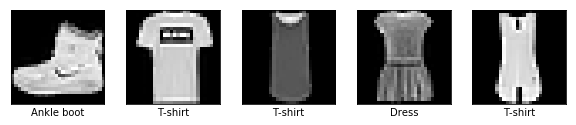

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [10]:
trainy = tf.keras.utils.to_categorical(y_train)

In [11]:
testy = tf.keras.utils.to_categorical(y_test)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [12]:
x_train_reshaped = x_train/255
x_test_reshaped = x_test/255

### 9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [54]:
x_train_dim =np.array( tf.keras.backend.expand_dims(x_train_reshaped,axis=-1))
x_test_dim = np.array(tf.keras.backend.expand_dims(x_test_reshaped,axis=-1))

In [53]:
type(x_train_dim)

numpy.ndarray

In [15]:
#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
# Due to speed issue in jupyter notebook we are not using expand_dims in model

###10. Import the necessary layers from keras to build the model

In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [21]:
#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dense (Dense)                (None, 24, 24, 128)       4224      
_________________________________________________________________
dense_1 (Dense)              (None, 24, 24, 10)        1290      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        2

In [24]:
#Train the model
model.fit(x_train_reshaped,trainy,          
          validation_data=(x_test_reshaped,testy),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.4238 - accuracy: 0.8436 - val_loss: 0.3108 - val_accuracy: 0.8819
Epoch 2/10
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.2594 - accuracy: 0.9045 - val_loss: 0.2755 - val_accuracy: 0.9011
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2067 - accuracy: 0.9247 - val_loss: 0.2595 - val_accuracy: 0.9062
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.1617 - accuracy: 0.9404 - val_loss: 0.3043 - val_accuracy: 0.8964
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.1228 - accuracy: 0.9544 - val_loss: 0.3039 - val_accuracy: 0.9057
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.0874 - accuracy: 0.9675 - val_loss: 0.3529 - val_accuracy: 0.9038
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [26]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()


#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))


#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))
#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Add another dropout layer
model2.add(Dropout(0.25))

#Output layer
model2.add(Dense(10, activation='softmax'))

###13. Verify accuracy of the model

> 

In [27]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [29]:
#Train the model
model2.fit(x_train_reshaped,trainy,          
          validation_data=(x_test_reshaped,testy),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.3939 - accuracy: 0.8588 - val_loss: 0.2808 - val_accuracy: 0.8968
Epoch 2/10
60000/60000 [==============================] - 36s 599us/sample - loss: 0.2561 - accuracy: 0.9063 - val_loss: 0.2621 - val_accuracy: 0.9039
Epoch 3/10
60000/60000 [==============================] - 36s 598us/sample - loss: 0.2084 - accuracy: 0.9222 - val_loss: 0.2333 - val_accuracy: 0.9192
Epoch 4/10
60000/60000 [==============================] - 36s 601us/sample - loss: 0.1716 - accuracy: 0.9363 - val_loss: 0.2260 - val_accuracy: 0.9211
Epoch 5/10
60000/60000 [==============================] - 37s 612us/sample - loss: 0.1470 - accuracy: 0.9460 - val_loss: 0.2355 - val_accuracy: 0.9208
Epoch 6/10
60000/60000 [==============================] - 36s 598us/sample - loss: 0.1238 - accuracy: 0.9530 - val_loss: 0.2598 - val_accuracy: 0.9187
Epoch 7/10
60000/60000 [====================

####14. Verify performance of your model selectively 

In [36]:
predictions = model2.predict(x_train_reshaped)

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='red')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

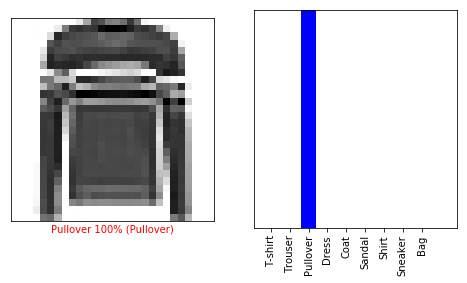

In [35]:
import numpy as np
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [45]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=5)
datagen.fit(tf.keras.backend.expand_dims(x_test,axis=-1))

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

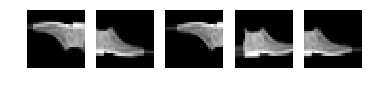

In [46]:
from matplotlib import pyplot as plt
gen = datagen.flow(tf.keras.backend.expand_dims(x_test_reshaped[0:1],axis=-1), batch_size=1)
#gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [55]:
# directly we have used tf.keras.backend.expand_dims for data agumentation

In [42]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=5)